<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Steven Barragan <br> 
Fecha: 13/07/2022

# Importación de librerias necesarias

In [85]:
#Para esta actividad se importarán las siguientes librerías:
#Importamos la libreria pandas
import pandas as pd

#Importacion de la libreria matplotlib
import matplotlib.pyplot as plt

#Importacion de la libreria numpy
import numpy as np

#Importacion de la libreria seaborn
import seaborn as sns

#Importacion la clase train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split


## Cargar el Dataset

In [65]:
#Código para cargar el Dataset
# seleccionamos el archivo
filename = 'Car_Prices_Dataset.csv'
#Cargamos el archivo
data_car = pd.read_csv(filename, header=0, sep=';')
# Transformamos en un dataframe
df = pd.DataFrame(data_car)

#Mostramos el dataset
df.head()


,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


## Descripción de la fuente del Dataset

**variable y** <br>
Precio: precio del carro

**Variables de entrada** <br>
Age: Antiguedad del carro en meses<br> 
Km: kilometros recorridos del coche<br> 
Weight: Peso del coche<br> 
HP: Caballos de fuerza<br> 
Metcolor: posee un color metalico (1=si/0=no)<br> 
CC: cilindraje del motor<br> 
Doors: número de puertas del carro<br> 




## Explique el problema a resolver. 
Se requiere predecir el precio de un coche en función a ciertas caracteristicas que son tomadas en cuenta, entre las cuales tenemos la edad, los kilometros recorridos, el peso del coche, caballos de fuerza, si el vehiculo posee un color metalico, el cilindraje del motor y el número de puertas. Todas estas caracteristicas son tomadas en cuenta para determinar el precio final del vehiculo.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total: 1435.
>- Número de atributos de entrada, su significado y tipo.<br>
>- Estadísticas de la variable objetivo.<br>
>- Estadísticas los atributos en relación con la variable objetivo.


In [66]:
#Código que responde a la descripción anterior
df.describe()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,56.027178,68571.782578,1071.659930,101.491986,0.674564,1566.735192,4.032753,10720.915679
std,18.532943,37491.094553,47.688509,14.981408,0.468701,186.767122,0.952667,3608.732978
min,1.000000,1.000000,1000.000000,69.000000,0.000000,1300.000000,2.000000,4350.000000
25%,44.000000,43000.000000,1040.000000,90.000000,0.000000,1400.000000,3.000000,8450.000000
50%,61.000000,63451.000000,1070.000000,110.000000,1.000000,1600.000000,4.000000,9900.000000
75%,70.000000,87041.500000,1085.000000,110.000000,1.000000,1600.000000,5.000000,11950.000000
max,80.000000,243000.000000,1320.000000,192.000000,1.000000,2000.000000,5.000000,32500.000000


NameError: name 'df' is not defined

Se pudo visualizar mediante la ejecución del comando describe ciertas caracteristicas, entre las cuales podemos destacar el promedio de antiguedad de los coches el cual es de 56.02 meses, con un recorrido promedio de 68571.78 Km, con un promedio de caballos de fuerza de 101.49, y generando un precio promedio de 10720.92$

En función de las caracteristicas de cada coche, los precios oscilan entre los 4350 y los 32500$. La valor que cada caracteristica toma puede cambiar sustancialmente el precio final, por lo cual, el modelo debe ser capaz de efectuar estas predicciones con una gran precisión.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [67]:
# Variable objetivo y variables de entrada
# Asignamos la variables X
X = df.drop('Price', axis =1)
# Asignamos la variable Price como Y
Y = df[['Price']]

In [68]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [69]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(Y)

In [70]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(Y)

## División del dataset en datos de entrenamiento y datos de test 

In [71]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Dividimos los datos del dataset.
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.3, random_state=0)

#Visualizacion de los datos obtenidos
X_train.shape, X_test.shape

((1004, 7), (431, 7))

## Regresión Lineal

In [72]:
#Código del modelo
#Importamos modelo linear de la libreria sklearn
from sklearn import linear_model
# Creamos el objeto de Regresión Linear
regresion = linear_model.LinearRegression()

In [73]:
#Entrenamiento
#Alimentamos el modelo con los datos de entrenamiento
regresion.fit(X_train, y_train)

LinearRegression()

In [2]:
#Test
# guardamos el resultado de la predicción del test
y_pred = regresion.predict(X_test)

# Mostramos las predicciones
##print(y_pred)

## Evaluación del Modelo

In [100]:
#Evaluación del modelo
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8780940972997864

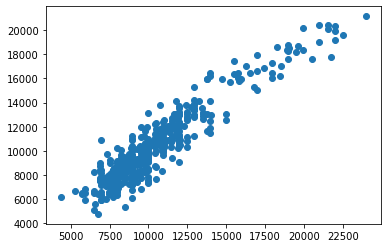

In [106]:
# Visualización de resultados
plt.scatter(y_test,y_pred)

Mediante el análisis de los datos de test y prueba, podemos apreciar en la gráfica que los elementos se estan ajustando al modelo de regreción lineal, con una precisión del 87.80% durante la predicción del precio de los vehiculos. A pesar de las diferentes caracteristicas que posee cada vehiculo, el modelo mediante los datos que fueron utilizados para el entrenamiento, genera perfiles similares y trata de predecir con exactitud el precio de los vehiculos con las caracteristicas utilizadas para las pruebas.